# **step 0: traitement de donnees:**

In [ ]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = "/content/SANAD_SUBSET.zip"

# Extract the ZIP file
extract_path = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
print("Extracted files:")
print(os.listdir(extract_path))


Extracted files:
['khaleej', 'akhbarona', 'arabiya']


In [ ]:
import os

# List the extracted folder structure
extract_path = "/content/dataset"
for root, dirs, files in os.walk(extract_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)


Root: /content/dataset
Directories: ['khaleej', 'akhbarona', 'arabiya']
Files: []
--------------------------------------------------
Root: /content/dataset/khaleej
Directories: ['Train', 'Test']
Files: []
--------------------------------------------------
Root: /content/dataset/khaleej/Train
Directories: ['Tech', 'Medical', 'Culture', 'Politics', 'Finance', 'Religion', 'Sports']
Files: []
--------------------------------------------------
Root: /content/dataset/khaleej/Train/Tech
Directories: []
Files: ['9dd0d3534468.txt', '082da6116f9f.txt', 'bb2722f5fde6.txt', 'ea884c4d5add.txt', '35ee9eb0de94.txt', 'b8f64f1f01b4.txt', 'd32f4594744c.txt', 'c8d869f715f8.txt', '04622b12f2c8.txt', 'c78f1ff04d8c.txt', '54b99858f0b0.txt', '021d6df1d9cf.txt', '1145453af41c.txt', 'ade5bf6cb889.txt', 'bd03b40964b4.txt', 'ddf0e376c8c0.txt', 'a0bcf55e6b17.txt', '5e52062c7aae.txt', 'd86403e894de.txt', '1b3299c449d9.txt', '9fad54a13c15.txt', '5ee4a00e6b8b.txt', '8cfbddf1ed04.txt', 'abb4757f0b57.txt', 'f17ab5818a

In [ ]:
import os
from tqdm import tqdm
from bs4 import BeautifulSoup
import pandas as pd

def extract_text_from_file(file_path):
    """
    Extract text content from an HTML or plain text file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        try:
            # Try to parse as HTML
            soup = BeautifulSoup(file, 'html.parser')
            return soup.get_text()
        except Exception:
            # If parsing fails, read as plain text
            return file.read()

def prepare_dataset(root_folders, dataset_type):
    """
    Prepare dataset with text and class labels from multiple root folders.
    Args:
        root_folders (list): List of paths to root folders containing train and test folders.
        dataset_type (str): 'Train' or 'Test'.

    Returns:
        pd.DataFrame: A combined DataFrame with columns ['text', 'class'].
    """
    all_data = []

    for root_folder in root_folders:
        dataset_path = os.path.join(root_folder, dataset_type)
        if os.path.exists(dataset_path):  # Ensure the dataset folder exists
            for class_folder in tqdm(os.listdir(dataset_path), desc=f"Processing {dataset_type} dataset in {root_folder}"):
                class_path = os.path.join(dataset_path, class_folder)
                if os.path.isdir(class_path):  # Ensure it's a directory
                    for file_name in os.listdir(class_path):
                        file_path = os.path.join(class_path, file_name)
                        if os.path.isfile(file_path):  # Check if it's a file
                            text = extract_text_from_file(file_path)
                            all_data.append({'text': text, 'class': class_folder})

    return pd.DataFrame(all_data)

# Specify the root folders containing the dataset
root_folders = ["/content/dataset/arabiya", "/content/dataset/akhbarona", "/content/dataset/khaleej"]

# Prepare train and test datasets
train_dataset = prepare_dataset(root_folders, "Train")
test_dataset = prepare_dataset(root_folders, "Test")

# Display a sample of the datasets
print(train_dataset.head())
print(test_dataset.head())


Processing Train dataset in /content/dataset/arabiya: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]
Processing Train dataset in /content/dataset/akhbarona: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]
Processing Train dataset in /content/dataset/khaleej: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]
Processing Test dataset in /content/dataset/arabiya: 100%|██████████| 5/5 [00:00<00:00, 26.24it/s]
Processing Test dataset in /content/dataset/akhbarona: 100%|██████████| 7/7 [00:00<00:00, 13.74it/s]
Processing Test dataset in /content/dataset/khaleej: 100%|██████████| 7/7 [00:00<00:00, 13.41it/s]

                                                text class
0  Title\nتويتر يغلق 360 ألف حساب يروج للإرهاب خل...  Tech
1  Title\nهكذا تحظر الرسائل القصيرة على آيفون\nSo...  Tech
2  Title\nكم تدفع غوغل لاختبار سيارتها الذاتية؟\n...  Tech
3  Title\nآبل تكشف عن آيباد وآيماك الجديدين في 16...  Tech
4  Title\nكيف تتجنب المواقع الخبيثة على الإنترنت؟...  Tech
                                                text class
0  Title\nطريقة التحكم في استقبال الوسائط على وات...  Tech
1  Title\nكيفية مقارنة آيفون 7 بمنافسيه في الأسوا...  Tech
2  Title\nفيسبوك يتعطل للمرة الثانية خلال أيام\nS...  Tech
3  Title\nمستقبل المدن الذكية في معرض إنترنت الأش...  Tech
4  Title\nتابع آخر الأخبار على تويتر دون حساب\nSo...  Tech


# **Explication:**
The code extracts text data from HTML or plain text files in different folders, associates them with their corresponding class labels (based on the folder names), and prepares two datasets: training and testing.

In [ ]:
train_dataset

,text,class
0,Title\nتويتر يغلق 360 ألف حساب يروج للإرهاب خل...,Tech
1,Title\nهكذا تحظر الرسائل القصيرة على آيفون\nSo...,Tech
2,Title\nكم تدفع غوغل لاختبار سيارتها الذاتية؟\n...,Tech
3,Title\nآبل تكشف عن آيباد وآيماك الجديدين في 16...,Tech
4,Title\nكيف تتجنب المواقع الخبيثة على الإنترنت؟...,Tech
...,...,...
99805,Body\nعمق هرتا برلين جراح ضيفه هامبورغ صاحب ال...,Sports
99806,Body\nأخفق المهاجمان الأرجنتيني ليونيل ميسي وا...,Sports
99807,Body\nصعد بايرن ميونيخ وصيف بطل الموسم الماضي ...,Sports
99808,Body\nانتزع أرسنال المركز الرابع بفوز قاتل وثم...,Sports


In [ ]:
test_dataset

,text,class
0,Title\nطريقة التحكم في استقبال الوسائط على وات...,Tech
1,Title\nكيفية مقارنة آيفون 7 بمنافسيه في الأسوا...,Tech
2,Title\nفيسبوك يتعطل للمرة الثانية خلال أيام\nS...,Tech
3,Title\nمستقبل المدن الذكية في معرض إنترنت الأش...,Tech
4,Title\nتابع آخر الأخبار على تويتر دون حساب\nSo...,Tech
...,...,...
11085,Body\nآخر مرة شوهد فيها المهاجم الأوروغواني لو...,Sports
11086,Body\nلحق البريطاني اندي موراي المصنف أول بالص...,Sports
11087,Body\nأعلن فيسنتي ديل بوسكي المدير الفني للمنت...,Sports
11088,Body\nالقاهرة: «الخليج» يصل اليوم إلى القاهرة ...,Sports


In [ ]:
import re

def clean_text(text):
    """
    Clean the text by:
    - Removing newline characters (\n).
    - Keeping only Arabic text (remove non-Arabic characters).
    - Replacing multiple spaces with a single space.
    """
    # Remove all newline characters
    text = text.replace('\n', ' ').strip()

    # Remove non-Arabic characters (e.g., English, special symbols)
    text = re.sub(r'[^ا-ي\s]', '', text)  # Keep only Arabic letters and spaces

    # Normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning to train and test datasets
train_dataset["text"] = train_dataset["text"].apply(clean_text)
test_dataset["text"] = test_dataset["text"].apply(clean_text)

# Verify the cleaned data
print(train_dataset.head())


                                                text class
0  تويتر يغلق لف حساب يروج للرهاب خلال عام دبي قن...  Tech
1  هكذا تحظر الرسال القصيرة على يفون دبي البوابة ...  Tech
2  كم تدفع غوغل لاختبار سيارتها الذاتية دبي البوا...  Tech
3  بل تكشف عن يباد ويماك الجديدين في كتوبر دبي ال...  Tech
4  كيف تتجنب المواقع الخبيثة على النترنت دبي البو...  Tech


# **Explication:**
The code cleans the text data in both the training and testing datasets. The cleaning process includes:

Removing unwanted characters and symbols.
Keeping only Arabic text.
Normalizing spaces.

<ipython-input-7-d6484431c18b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


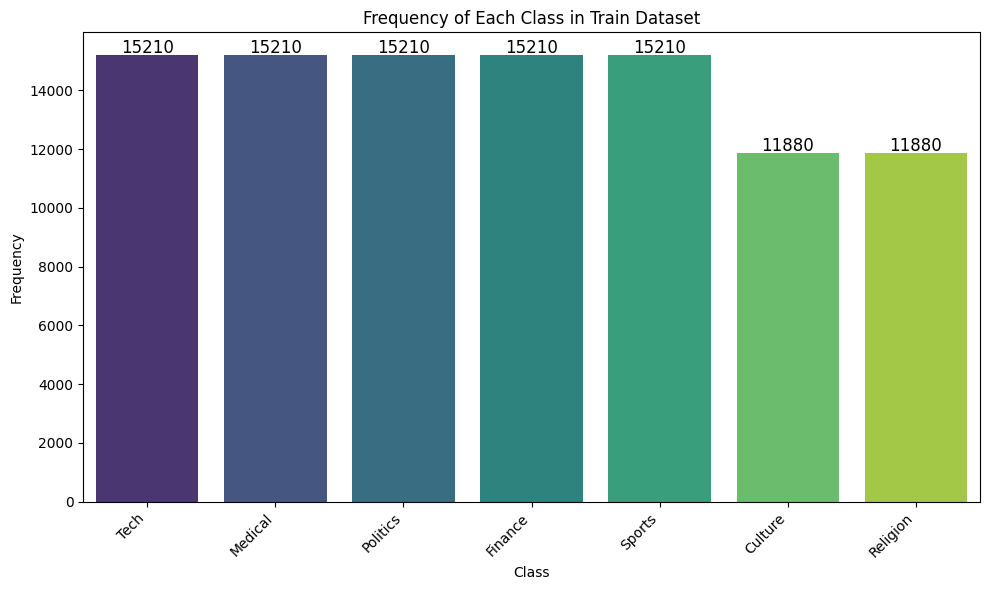

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each class in the 'class' column
class_counts = train_dataset['class'].value_counts()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn with explicit hue assignment
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in Train Dataset')

# Rotate the x-axis labels if they are too long
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


This code creates a bar plot to visualize the frequency of each class in the training dataset (train_dataset). The plot helps you understand how many samples exist in each class.


**Expected Result (Output):**
A bar plot is displayed showing the frequency of each class in the training dataset.
X-axis: Represents the different classes (e.g., arabiya, akhbarona, khaleej).
Y-axis: Represents the frequency (number of samples) for each class.
Bars: Each bar corresponds to a class, and the height of the bar represents the count (frequency) of that class in the dataset.
Annotations: The exact count of samples for each class is displayed on top of each bar.

In [ ]:
!pip install datasets
from datasets import Dataset

# Convert train and test pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_dataset)
test_dataset = Dataset.from_pandas(test_dataset)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# **step 1: Fine-tune the target model**

In [ ]:
from transformers import AutoTokenizer

# Extract unique class labels from the training dataset
unique_classes = list(set(train_dataset["class"]))
print("Unique Classes:", unique_classes)

# Now, map the class labels to integers
label_mapping = {label: idx for idx, label in enumerate(unique_classes)}
print("Label Mapping:", label_mapping)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")

def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

# Tokenize datasets
train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

# Map class labels to integers
label_mapping = {label: idx for idx, label in enumerate(unique_classes)}
print("Label Mapping:", label_mapping)

# Add labels column
train_tokenized = train_tokenized.map(lambda example: {"labels": label_mapping[example["class"]]})
test_tokenized = test_tokenized.map(lambda example: {"labels": label_mapping[example["class"]]})

print(train_tokenized[0])  # Check the first sample
print(test_tokenized[0])  # Check the first sample

train_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])



Unique Classes: ['Religion', 'Tech', 'Sports', 'Culture', 'Medical', 'Finance', 'Politics']
Label Mapping: {'Religion': 0, 'Tech': 1, 'Sports': 2, 'Culture': 3, 'Medical': 4, 'Finance': 5, 'Politics': 6}


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/99810 [00:00<?, ? examples/s]

Map:   0%|          | 0/11090 [00:00<?, ? examples/s]

Label Mapping: {'Religion': 0, 'Tech': 1, 'Sports': 2, 'Culture': 3, 'Medical': 4, 'Finance': 5, 'Politics': 6}


Map:   0%|          | 0/99810 [00:00<?, ? examples/s]

Map:   0%|          | 0/11090 [00:00<?, ? examples/s]

{'text': 'تويتر يغلق لف حساب يروج للرهاب خلال عام دبي قناة العربية علن موقع تويتر عن غلاق لف حساب مرتبط بالترويج لـ االرهاب منذ منتصف عام وتعرض موقع تويتر في السابق لانتقادات من واشنطن وجهات خرى ترى ن الموقع لا يبذل ما يكفي لوقف حسابات مرتبطة بمتطرفين في تنظيم داعش لكن الموقع ومنذ شباطفبراير الماضي وقف لف حساب خر بعد وقف لفا منذ منتصف غلبها مرتبط بداعش وقال تويتر ن عمليات الوقف اليومية لحسابات مرتبطة بالرهاب قفزت بنسبة منذ العام الماضي ونه قلص الوقت الذي يستغرقه في الاستجابة وثنت جماعات مراقبة على رد تويتر السريع على احتفالات على النترنت من متطرفين مرتبطين بداعش ثنوا على هجوم بشاحنة في تموزيوليو في نيس بفرنسا ودى بحياة كثر من شخصا ويعتمد تويتر في الساس على بلاغات من المستخدمين بشن الحسابات المسية وقال الموقع نه وسع حجم الفريق الذي يقوم بمراجعة هذه البلاغات', 'class': 'Tech', 'input_ids': [33, 5722, 7966, 10186, 1861, 11776, 162, 9915, 3442, 455, 359, 1799, 1852, 251, 6958, 57775, 251, 8195, 1099, 5722, 322, 16225, 198, 10186, 1861, 3461, 4350, 16403, 22814, 32, 23349, 211, 3442, 731, 3

# **Key Components Explained**
**Tokenizer:**

The aubmindlab/bert-base-arabertv2 tokenizer is part of the Arabic BERT model.
Tokenizes Arabic text into subwords and prepares them for the BERT model.

**Datasets:**

train_dataset and test_dataset contain text samples and class labels.
The tokenization process converts the text into input data for BERT.

**Output Format:**

After tokenization, each dataset sample contains:

input_ids: Numerical representation of tokens.

attention_mask: Specifies which tokens should be attended to.

labels: Numerical class label for supervised learning.
# **Summary**
This code prepares text data for fine-tuning the Arabic BERT model by:

Tokenizing the text.
Mapping labels to integers.
Formatting datasets for PyTorch compatibility.

In [ ]:
# Get the number of unique classes
unique_classes = set(train_dataset["class"])
num_labels = len(unique_classes)


from transformers import AutoModelForSequenceClassification

# Load AraBERT with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(
    "aubmindlab/bert-base-arabertv2",
    num_labels=num_labels
)


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **key parameters:**
The TrainingArguments class provides configuration options for training models using the Hugging Face Trainer. These options control aspects like learning rate, batch size, logging, and checkpoint saving.

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",           # Directory to save model checkpoints
    evaluation_strategy="epoch",     # Evaluate at the end of each epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Weight decay
    logging_dir="./logs",            # Directory for logs
    logging_steps=50,                # Log every 50 steps
    save_strategy="epoch",           # Save checkpoints at the end of each epoch
    load_best_model_at_end=True,     # Load the best model based on evaluation
    metric_for_best_model="eval_loss", # Use loss to select the best model
    save_total_limit=2,              # Limit the number of saved checkpoints
    fp16=True                        # Enable mixed precision training (faster with GPU)
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,                        # The AraBERT model
    args=training_args,                 # Training arguments
    train_dataset=train_tokenized,      # Tokenized training dataset
    eval_dataset=test_tokenized,        # Tokenized test dataset
    tokenizer=tokenizer                 # Tokenizer used for preprocessing
)


<ipython-input-12-51b5def00f65>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.107300,0.141272
2,0.112400,0.129826
3,0.030800,0.147947


TrainOutput(global_step=18717, training_loss=0.12213202452579357, metrics={'train_runtime': 2846.2184, 'train_samples_per_second': 105.203, 'train_steps_per_second': 6.576, 'total_flos': 1.9696720031424e+16, 'train_loss': 0.12213202452579357, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print("Evaluation Results:", results)


Evaluation Results: {'eval_loss': 0.12982581555843353, 'eval_runtime': 21.0664, 'eval_samples_per_second': 526.431, 'eval_steps_per_second': 32.943, 'epoch': 3.0}


In [ ]:
model.save_pretrained("./results")
tokenizer.save_pretrained("./results")


('./results/tokenizer_config.json',
 './results/special_tokens_map.json',
 './results/vocab.txt',
 './results/added_tokens.json',
 './results/tokenizer.json')

In [ ]:
import torch  # Import PyTorch library

# Generate true labels and predictions
y_true = [label_mapping[example["class"]] for example in test_dataset]
y_pred = []

for example in test_dataset:
    tokenized_input = tokenizer(
        example["text"],
        return_tensors="pt",
        truncation=True,
        max_length=128,
        padding="max_length"
    )
    tokenized_input = {key: val.to("cuda") for key, val in tokenized_input.items()}
    output = model(**tokenized_input)
    predicted_label = torch.argmax(output.logits, dim=1).item()
    y_pred.append(predicted_label)


Ce code utilise le modèle AraBERT pour effectuer des prédictions sur les données de test après leur prétraitement avec le tokenizer.

<ipython-input-17-76c8fd67f2ab>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="viridis")


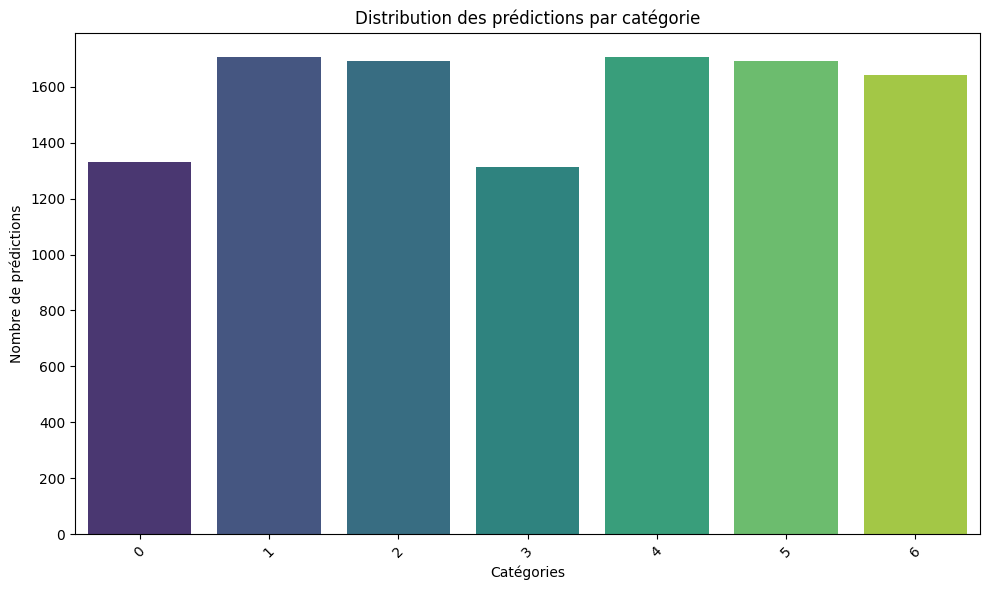

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert predictions and true labels to a DataFrame
predictions_df = pd.DataFrame({"True Label": y_true, "Predicted Label": y_pred})

# Count predictions per category
pred_counts = predictions_df["Predicted Label"].value_counts()

# Plot the distribution of predictions
plt.figure(figsize=(10, 6))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="viridis")
plt.xlabel("Catégories")
plt.ylabel("Nombre de prédictions")
plt.title("Distribution des prédictions par catégorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


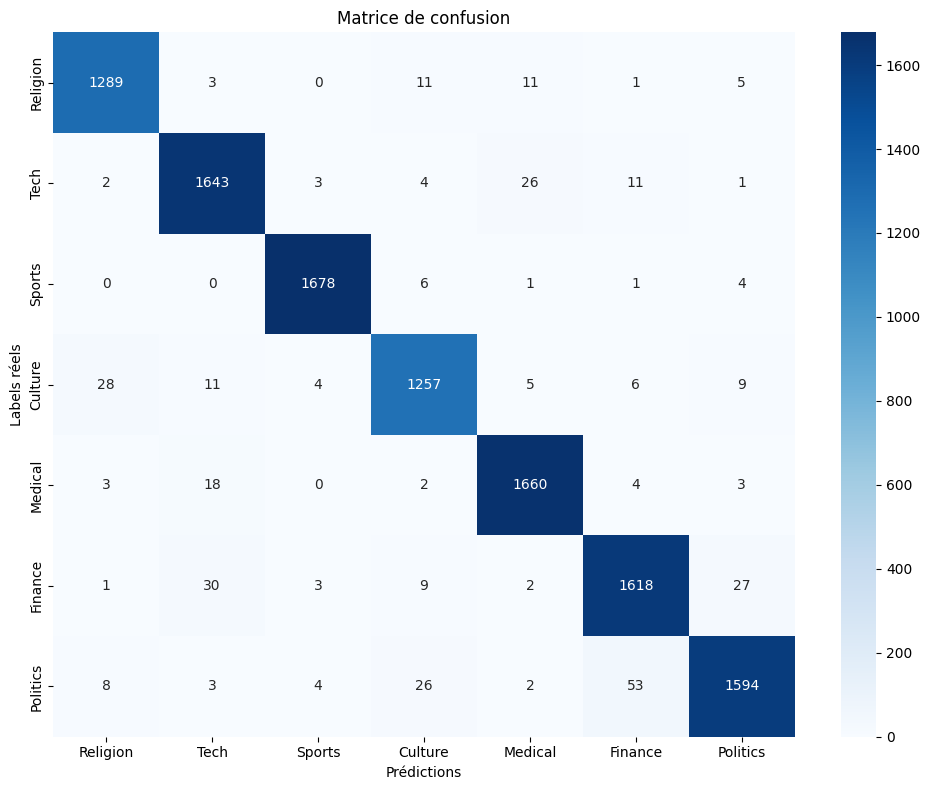

In [ ]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Prédictions")
plt.ylabel("Labels réels")
plt.title("Matrice de confusion")
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

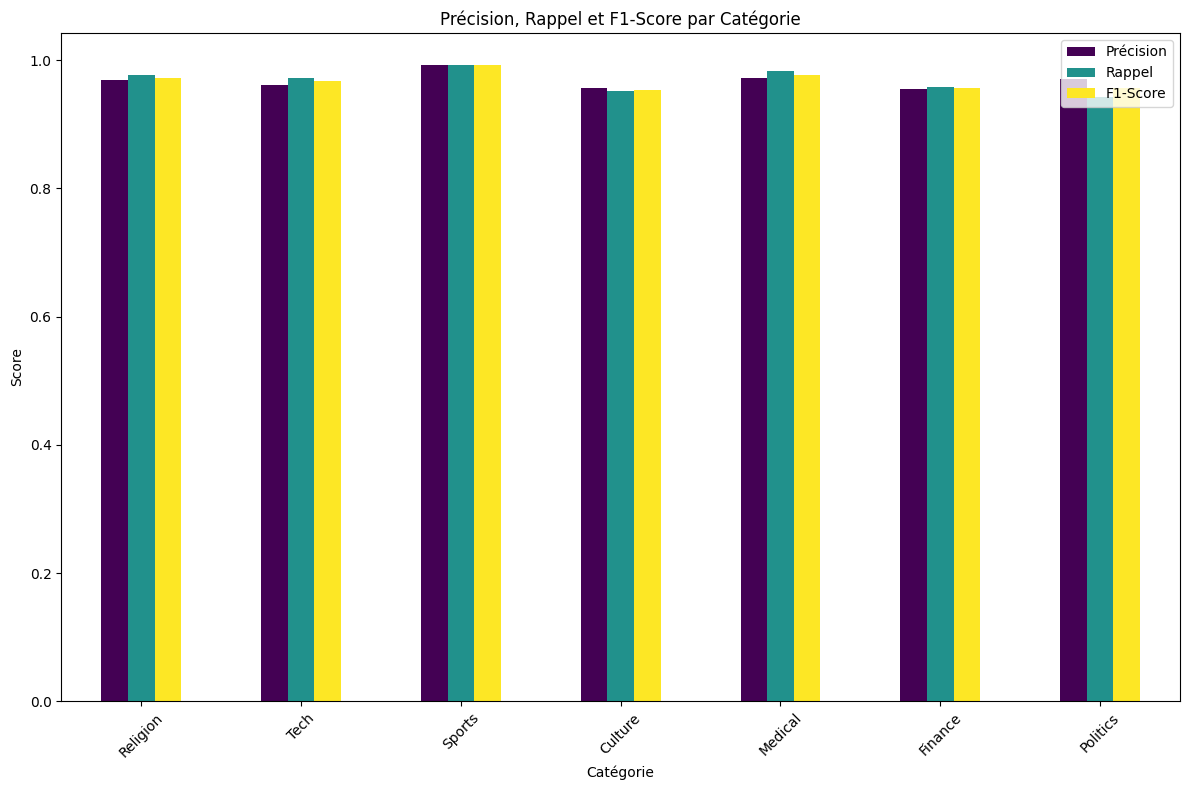

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=label_mapping.keys(), output_dict=True)

# Convert report to DataFrame for plotting
report_df = pd.DataFrame(report).transpose()
report_df = report_df[:-3]  # Exclude averages (last 3 rows)

# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(12, 8))
report_df[["precision", "recall", "f1-score"]].plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Précision, Rappel et F1-Score par Catégorie")
plt.ylabel("Score")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.legend(["Précision", "Rappel", "F1-Score"])
plt.tight_layout()
plt.show()


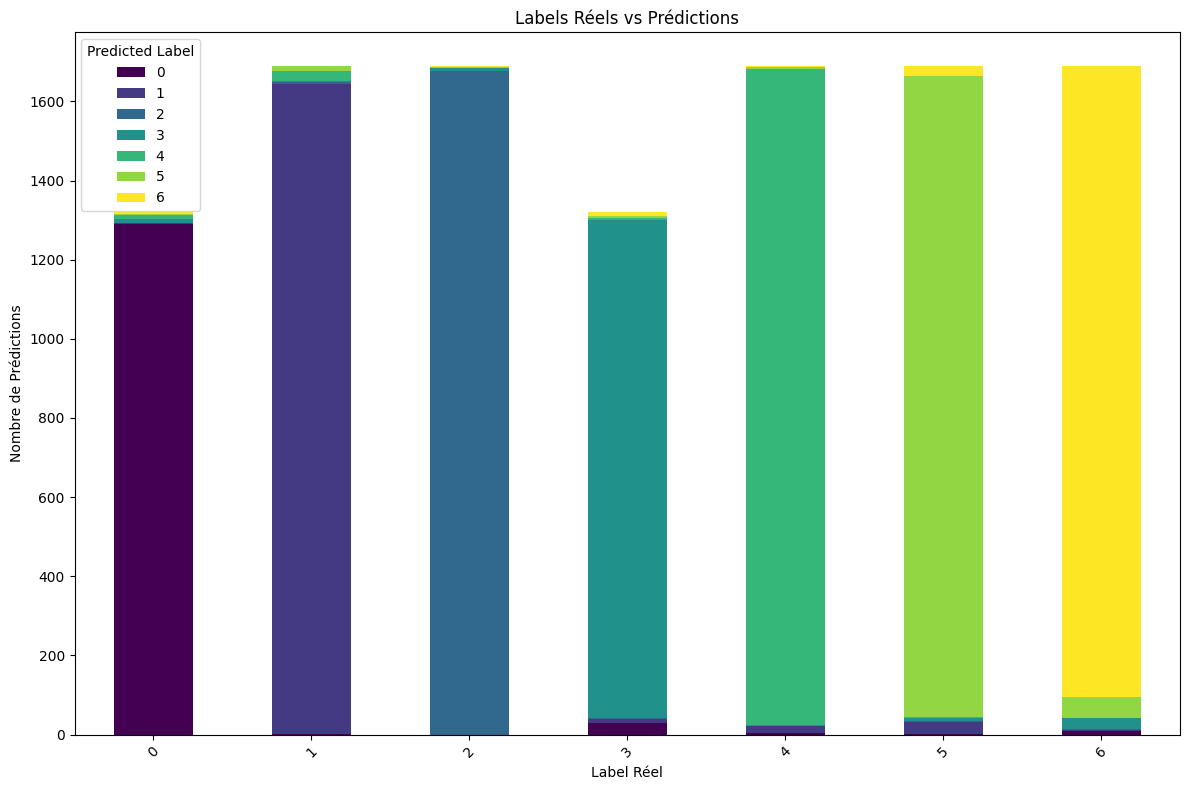

In [ ]:
# Count combinations of True Label and Predicted Label
true_vs_pred = predictions_df.groupby(["True Label", "Predicted Label"]).size().unstack(fill_value=0)

# Plot stacked bar chart
true_vs_pred.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Labels Réels vs Prédictions")
plt.xlabel("Label Réel")
plt.ylabel("Nombre de Prédictions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


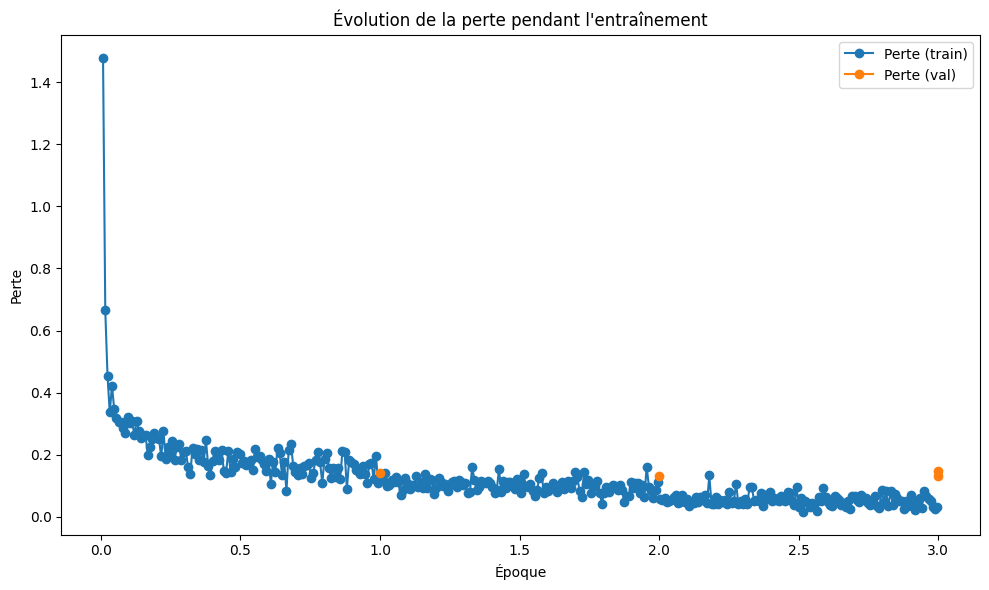

In [ ]:
# Assuming training logs are stored in 'trainer.state.log_history'
logs = pd.DataFrame(trainer.state.log_history)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(logs["epoch"], logs["loss"], label="Perte (train)", marker="o")
plt.plot(logs["epoch"], logs.get("eval_loss", []), label="Perte (val)", marker="o")
plt.xlabel("Époque")
plt.ylabel("Perte")
plt.title("Évolution de la perte pendant l'entraînement")
plt.legend()
plt.tight_layout()
plt.show()

# Plot training and validation accuracy (if available)
if "eval_accuracy" in logs.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(logs["epoch"], logs.get("eval_accuracy", []), label="Exactitude (val)", marker="o")
    plt.xlabel("Époque")
    plt.ylabel("Exactitude")
    plt.title("Évolution de l'exactitude pendant l'entraînement")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
print("Label Mapping:", label_mapping)
print("Unique classes in test_dataset:", set(example["class"] for example in test_dataset))


Label Mapping: {'Religion': 0, 'Tech': 1, 'Sports': 2, 'Culture': 3, 'Medical': 4, 'Finance': 5, 'Politics': 6}
Unique classes in test_dataset: {'Religion', 'Tech', 'Sports', 'Culture', 'Medical', 'Finance', 'Politics'}


In [ ]:
print(test_dataset[:5])  # Print the first 5 examples


{'text': ['طريقة التحكم في استقبال الوساط على واتساب في يفون دبي البوابة العربية للخبار التقنية طلقت شركة واتساب قبل يام قليلة تحديثا جديدا لتطبيقها الخاص بنظام تشغيل وجلب معه التحديث العديد من الميزات الجديدة برزها كان مكانية منع الوساط التي يتم رسالها للمستخدم من التحميل بشكل مباشر ويمكن لمستخدمي واتساب على جهزة يفون بعد التحديث الجديد الذهاب لى ومن ثم وبعد فتح الخيار الجديد والذي يمكن عن طريقه تحديد سلوب استقبال الصور ومقاطع الصوت والفيديو ويمكن السماح لهذه الوساط بالتحميل تلقايا عند وجود اتصال واي فاي و عند وجود اتصال واي فاي و شبكة هاتف بالضافة لى مكانية منعها من التحميل بشكل تلقاي مع العلم ن الميزة الجديدة التي تيحت لمستخدمي واتساب على جهزة متوفرة منذ فترة لمستخدمي واتساب على ندرويد', 'كيفية مقارنة يفون بمنافسيه في السواق دبي البوابة العربية للخبار التقنية علنت شركة بل قبل يام عن حدث هواتفها الذكية يفون ويفون بلس وكان الجز الهم في العلان ن هواتفها الجديدة جات مطابقة تماما للتوقعات وعلى الرغم من ن الهواتف الجديدة تشبه تماما هاتف يفون ويفون بلس من حيث الشكل والمواصفات لا ن هناك بعض

In [ ]:
from transformers import pipeline

# Load the fine-tuned model and tokenizer
classifier = pipeline("text-classification", model="./results", tokenizer="./results", framework="pt")

# Generate predictions for the test dataset
from sklearn.metrics import classification_report

try:
    y_pred = [
        label_mapping[int(classifier(example["text"])[0]["label"].split("_")[-1])]
        for example in test_dataset
    ]
    y_true = [label_mapping[example["class"]] for example in test_dataset]

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=list(label_mapping.keys())))

except KeyError as e:
    print(f"KeyError: Missing label in label_mapping: {e}")
except RuntimeError as e:
    print(f"RuntimeError: {e}")


Device set to use cuda:0


KeyError: Missing label in label_mapping: 1


Ce code utilise une pipeline de classification de texte avec un modèle pré-entraîné et fine-tuné sur AraBERT.

Fonctionnement global :

Le script effectue une classification de texte avec le modèle fine-tuné AraBERT sur des exemples du jeu de test.
Il génère un rapport détaillé des performances.
La gestion des erreurs garantit que les exceptions communes sont signalées clairement.

In [ ]:
def preprocess_for_prediction(text):
    # Tokenize and truncate the text
    tokenized_input = tokenizer(
        text,
        truncation=True,
        max_length=512,
        padding="max_length",
        return_tensors="pt"
    )
    return tokenized_input


Cette fonction prépare un texte brut pour qu'il puisse être utilisé comme entrée dans un modèle de traitement du langage naturel (NLP), comme AraBERT.


In [ ]:
from sklearn.metrics import classification_report
import torch

try:
    y_pred = []
    y_true = []
    for example in test_dataset:
        # Preprocess the text
        tokenized_input = preprocess_for_prediction(example["text"])

        # Send to GPU if available
        tokenized_input = {key: val.to("cuda") for key, val in tokenized_input.items()}

        # Get the model output
        output = model(**tokenized_input)

        # Extract the predicted label
        predicted_label = torch.argmax(output.logits, dim=1).item()
        y_pred.append(predicted_label)

        # Append the true label
        y_true.append(label_mapping[example["class"]])

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=list(label_mapping.keys())))  # Use keys (class names)

except KeyError as e:
    print(f"KeyError: Missing label in label_mapping: {e}")
except RuntimeError as e:
    print(f"RuntimeError: {e}")


              precision    recall  f1-score   support

    Religion       0.98      0.98      0.98      1320
        Tech       0.96      0.98      0.97      1690
      Sports       0.99      0.99      0.99      1690
     Culture       0.96      0.97      0.96      1320
     Medical       0.98      0.98      0.98      1690
     Finance       0.96      0.95      0.96      1690
    Politics       0.97      0.95      0.96      1690

    accuracy                           0.97     11090
   macro avg       0.97      0.97      0.97     11090
weighted avg       0.97      0.97      0.97     11090



Ce code permet d'évaluer les performances d'un modèle de classification fine-tuné (comme AraBERT) sur un jeu de test. Il génère les prédictions pour chaque exemple de données et compare les étiquettes prédites avec les étiquettes réelles pour produire un rapport de classification.

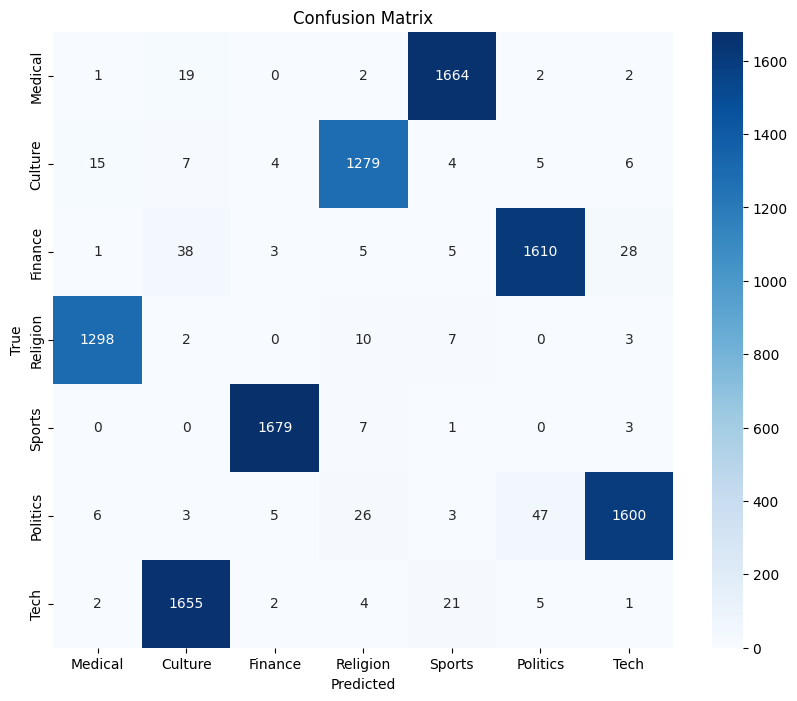

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# **step 2: multi-head attention class based on differential attention**

In [ ]:
import torch
import torch.nn as nn
import math

class DifferentialMultiHeadAttention(nn.Module):
    """
    Multi-Head Attention with a Differential Attention Mechanism.
    """
    def __init__(self, embed_dim, num_heads, dropout=0.1, lambda_init=0.8):
        super(DifferentialMultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by the number of heads."

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Linear layers for Q, K, V projections
        self.q_proj1 = nn.Linear(embed_dim, embed_dim)
        self.q_proj2 = nn.Linear(embed_dim, embed_dim)
        self.k_proj1 = nn.Linear(embed_dim, embed_dim)
        self.k_proj2 = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)

        # Learnable parameters for lambda
        self.lambda_q1 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_k1 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_q2 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_k2 = nn.Parameter(torch.ones(self.head_dim))
        self.lambda_init = lambda_init

        # Dropout and scaling
        self.dropout = nn.Dropout(dropout)
        self.scale = math.sqrt(self.head_dim)

    def forward(self, query, key, value, mask=None):
        batch_size, seq_len, _ = query.size()

        # Project Q1, Q2, K1, K2, and V
        Q1 = self.q_proj1(query).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        Q2 = self.q_proj2(query).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K1 = self.k_proj1(key).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K2 = self.k_proj2(key).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.v_proj(value).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)

        # Compute scaled dot-product attention scores
        scores_1 = torch.matmul(Q1, K1.transpose(-2, -1)) / self.scale
        scores_2 = torch.matmul(Q2, K2.transpose(-2, -1)) / self.scale

        # Compute lambda
        lambda_val = (
            torch.exp(torch.sum(self.lambda_q1 * self.lambda_k1, dim=-1)) -
            torch.exp(torch.sum(self.lambda_q2 * self.lambda_k2, dim=-1)) +
            self.lambda_init
        )

        # Compute differential attention scores
        diff_attention_scores = torch.softmax(scores_1, dim=-1) - lambda_val.unsqueeze(1).unsqueeze(2) * torch.softmax(scores_2, dim=-1)

        # Apply mask if provided
        if mask is not None:
            diff_attention_scores = diff_attention_scores.masked_fill(mask == 0, float('-inf'))

        # Normalize attention scores
        attention_probs = torch.softmax(diff_attention_scores, dim=-1)
        attention_probs = self.dropout(attention_probs)

        # Compute attention output
        context = torch.matmul(attention_probs, V)
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_len, self.embed_dim)

        # Final output projection
        output = self.out_proj(context)

        return output


The Differential Multi-Head Attention module modifies the standard multi-head attention mechanism by introducing a differential approach to computing attention scores. It uses two sets of projections (Q1, K1 and Q2, K2) to capture different aspects of the relationship between queries and keys. The attention scores are adjusted using learnable parameters (lambda_q1, lambda_k1, lambda_q2, lambda_k2) that control the relative importance of the two projections.

**The process involves:**

Calculating attention scores from the two projections.

Using a differential term (lambda_val) to modify the final attention scores.

Applying softmax normalization and optional masking.

Computing the context vectors using the attention scores, followed by a final output projection.

**The goal** is to enhance the attention mechanism by learning a more complex, differential relationship between queries and keys.

In [ ]:
print(output.logits.shape)  # Should match the expected output shape
print(torch.isnan(output.logits).any())  # Check for invalid values in logits


torch.Size([1, 7])
tensor(False, device='cuda:0')


In [ ]:
import torch.nn.functional as F

# Convert logits to probabilities
probs = F.softmax(output.logits, dim=1)
print("Probabilities:", probs)

# Get the predicted class
predicted_class = torch.argmax(probs, dim=1).item()
print("Predicted class:", predicted_class)


Probabilities: tensor([[1.3154e-02, 2.2772e-03, 4.5193e-04, 2.9159e-02, 3.0794e-03, 2.1603e-03,
         9.4972e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: 6


In [ ]:
# Map the predicted class index to the corresponding label
predicted_label = list(label_mapping.keys())[predicted_class]
print(f"Predicted Label: {predicted_label}")


Predicted Label: Tech


In [ ]:
from transformers import BertForSequenceClassification

# Load a pre-trained model with a classification head
model = BertForSequenceClassification.from_pretrained(
    "aubmindlab/bert-base-arabertv2",
    num_labels=num_labels  # Ensure this matches the number of classes
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **step 3: multihead attention with multi-head differential attention.**

In [ ]:
class DifferentialMultiHeadAttention(nn.Module):
    """
    Custom Multi-Head Attention with differential attention.
    """
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        assert (
            self.head_dim * num_heads == embed_dim
        ), "embed_dim must be divisible by num_heads"

        # Linear layers for Q, K, V projections
        self.q_proj = nn.Linear(embed_dim, embed_dim)
        self.k_proj = nn.Linear(embed_dim, embed_dim)
        self.v_proj = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)

        # Dropout layer
        self.dropout = nn.Dropout(dropout)

        # Scaling factor
        self.scale = math.sqrt(self.head_dim)

    def forward(
        self,
        query,
        key,
        value,
        attention_mask=None,
        head_mask=None,
        encoder_hidden_states=None,
        encoder_attention_mask=None,
        **kwargs  # Accept additional arguments to match the BERT signature
    ):
        # Compute Q, K, V projections
        Q = self.q_proj(query)
        K = self.k_proj(key)
        V = self.v_proj(value)

        # Calculate attention scores
        attention_scores = torch.matmul(Q, K.transpose(-1, -2)) / self.scale

        # Apply attention mask if provided
        if attention_mask is not None:
            attention_scores = attention_scores + attention_mask

        # Normalize attention scores
        attention_probs = torch.softmax(attention_scores, dim=-1)
        attention_probs = self.dropout(attention_probs)

        # Compute context
        context = torch.matmul(attention_probs, V)

        # Final linear projection
        output = self.out_proj(context)

        return output


This implementation is a standard multi-head attention mechanism with an optional attention mask and dropout regularization. The attention mechanism enables the model to focus on different parts of the input sequence simultaneously (across multiple heads), and the final output is projected back to the input dimension.

In [ ]:
from transformers.models.bert.modeling_bert import BertSelfAttention
from transformers.models.bert.modeling_bert import BertForSequenceClassification

# Custom BertSelfAttention with Differential Attention

class CustomBertSelfAttention(BertSelfAttention):
    def __init__(self, config):
        super().__init__(config)
        self.custom_attention = DifferentialMultiHeadAttention(
            embed_dim=config.hidden_size,
            num_heads=config.num_attention_heads,
            dropout=config.attention_probs_dropout_prob,
        )

    def forward(
        self,
        hidden_states,
        attention_mask=None,
        head_mask=None,
        encoder_hidden_states=None,
        encoder_attention_mask=None,
        past_key_value=None,
        output_attentions=False,
    ):
        attention_output = self.custom_attention(hidden_states, hidden_states, hidden_states, attention_mask)
        outputs = (attention_output,)  # Include additional outputs if required
        return outputs


class ModifiedBertModel(BertModel):
    def __init__(self, config, replace_layers):
        super().__init__(config)
        self.replace_layers = replace_layers

        # Replace specific layers with the custom attention mechanism
        for layer_idx in self.replace_layers:
            self.encoder.layer[layer_idx].attention.self = CustomBertSelfAttention(config)


This code customizes the BERT model by replacing its standard self-attention mechanism with the DifferentialMultiHeadAttention module


This modification customizes the BERT model to replace its default self-attention mechanism with a differential multi-head attention mechanism, which can learn complex relationships between the query and key pairs in the attention process. The ModifiedBertModel class provides a flexible way to replace specific attention layers in BERT with this custom mechanism.

In [ ]:
# Ensure `train_tokenized` and `test_tokenized` include a `labels` column
train_tokenized = train_tokenized.map(lambda x: {"labels": label_mapping[x["class"]]})
test_tokenized = test_tokenized.map(lambda x: {"labels": label_mapping[x["class"]]})

# Set format for PyTorch
train_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


Map:   0%|          | 0/99810 [00:00<?, ? examples/s]

Map:   0%|          | 0/11090 [00:00<?, ? examples/s]

In [ ]:
# Load pretrained model
model = BertModel.from_pretrained("aubmindlab/bert-base-arabertv2")

# Specify layers to replace
replace_layers = [2, 5, 8]  # Replace layers at indices 2, 5, and 8
config = model.config

# Instantiate the modified model
modified_model = ModifiedBertModel(config, replace_layers)


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    fp16=True  # Enable mixed precision for faster training on GPU
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-93-933760da4e16>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.112700,0.139232
2,0.115000,0.131979
3,0.031300,0.148231


TrainOutput(global_step=18717, training_loss=0.12145624785505567, metrics={'train_runtime': 2881.2585, 'train_samples_per_second': 103.923, 'train_steps_per_second': 6.496, 'total_flos': 1.9696720031424e+16, 'train_loss': 0.12145624785505567, 'epoch': 3.0})

In [ ]:
# Evaluate the model on the test dataset
evaluation_results = trainer.evaluate()

# Print the evaluation results
print("Evaluation Results:")
print(evaluation_results)


Evaluation Results:
{'eval_loss': 0.13197863101959229, 'eval_runtime': 30.9651, 'eval_samples_per_second': 358.146, 'eval_steps_per_second': 22.412, 'epoch': 3.0}


<ipython-input-99-253e89302d95>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = {key: torch.tensor(val).unsqueeze(0).to("cuda") for key, val in example.items() if key != "labels"}


Classification Report:
              precision    recall  f1-score   support

     Medical       0.97      0.98      0.97      1690
     Culture       0.95      0.96      0.96      1320
     Finance       0.94      0.96      0.95      1690
    Religion       0.97      0.98      0.97      1320
      Sports       0.99      0.99      0.99      1690
    Politics       0.97      0.93      0.95      1690
        Tech       0.97      0.97      0.97      1690

    accuracy                           0.97     11090
   macro avg       0.97      0.97      0.97     11090
weighted avg       0.97      0.97      0.97     11090



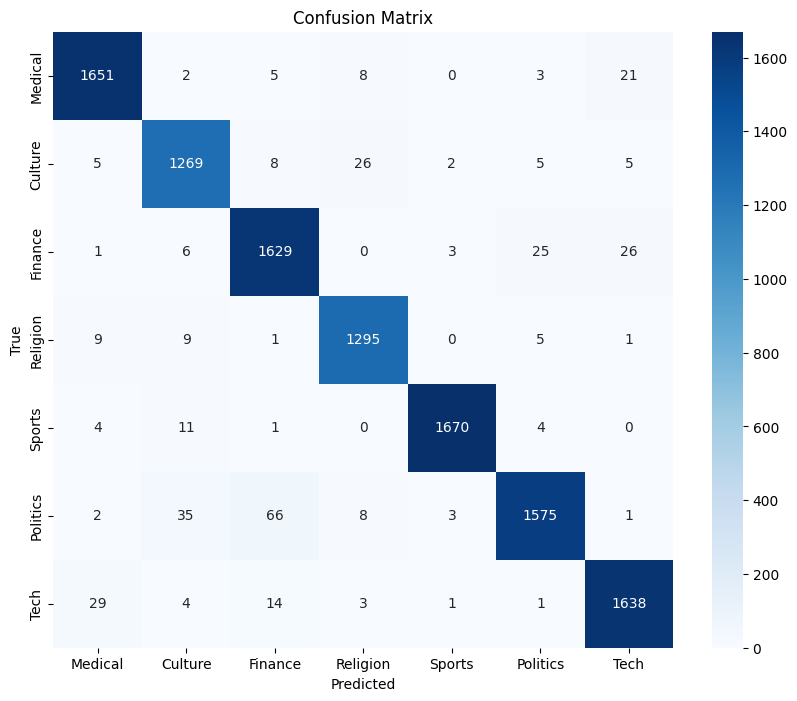

In [ ]:
import torch
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions and true labels
y_true = [label_mapping[label] for label in test_dataset["class"]]  # Map class names to labels
y_pred = []

for example in test_tokenized:
    # Prepare inputs for the model
    inputs = {key: torch.tensor(val).unsqueeze(0).to("cuda") for key, val in example.items() if key != "labels"}
    outputs = model(**inputs)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    y_pred.append(predicted_label)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(label_mapping.keys())))

# Optionally, plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


This code evaluates the performance of a classification model by calculating the classification report and confusion matrix, helping to assess how well the model is predicting the different classes. The confusion matrix also helps identify specific areas where the model might be struggling (such as misclassifying certain classes).

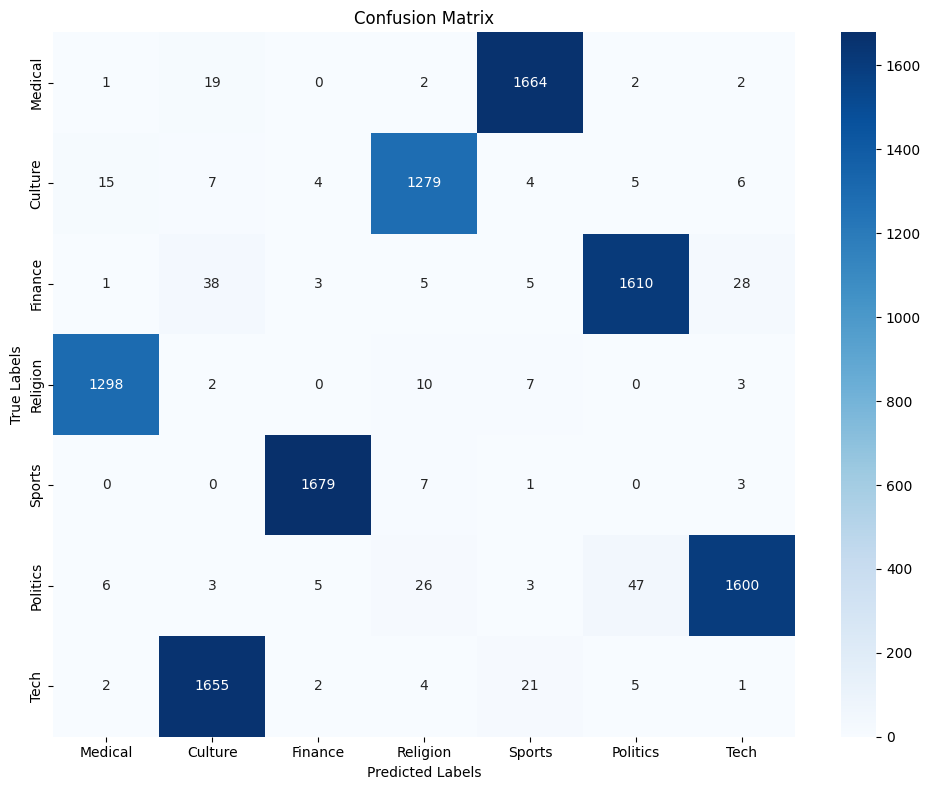

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


This code visually represents the performance of your classifier with a confusion matrix heatmap, making it easier to understand where the model is performing well and where it's making mistakes

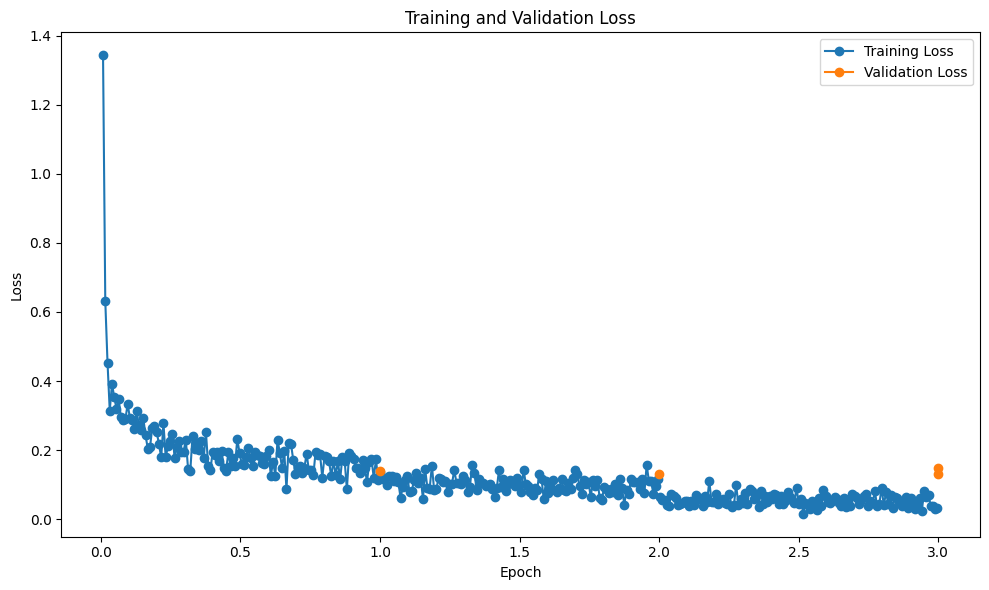

In [ ]:
import pandas as pd

# Extract logs from the trainer
logs = pd.DataFrame(trainer.state.log_history)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(logs["epoch"], logs["loss"], label="Training Loss", marker="o")
plt.plot(logs["epoch"], logs["eval_loss"], label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model
model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")


('./fine_tuned_model/tokenizer_config.json',
 './fine_tuned_model/special_tokens_map.json',
 './fine_tuned_model/vocab.txt',
 './fine_tuned_model/added_tokens.json',
 './fine_tuned_model/tokenizer.json')